In [153]:
import pandas as pd
df = pd.read_csv('ATP.csv')

/Users/petersinka/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,5,6,7,8,9,12,14,15,16,17,18,19,22,24,25,26,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [154]:
df = df[df['tourney_date'] != 'tourney_date']
df['winner_id'] = pd.to_numeric(df['winner_id'])
df['loser_id'] = pd.to_numeric(df['loser_id'])

## Most majors by players

In [155]:
# Most majors
gs_winner_df = df[(df['tourney_level'] == 'G') & (df['round'] == 'F')]
grouped = gs_winner_df.groupby('winner_name').count().sort_values('winner_id', ascending= False).ix[:,0]
grouped

winner_name
Roger Federer            18
Rafael Nadal             14
Pete Sampras             14
Novak Djokovic           12
Bjorn Borg               11
Ivan Lendl                8
Andre Agassi              8
Jimmy Connors             8
Mats Wilander             7
John Mcenroe              7
Stefan Edberg             6
Boris Becker              6
John Newcombe             5
Rod Laver                 5
Jim Courier               4
Ken Rosewall              4
Guillermo Vilas           4
Gustavo Kuerten           3
Jan Kodes                 3
Arthur Ashe               3
Andy Murray               3
Stanislas Wawrinka        3
Patrick Rafter            2
Lleyton Hewitt            2
Sergi Bruguera            2
Stan Smith                2
Marat Safin               2
Yevgeny Kafelnikov        2
Johan Kriek               2
Ilie Nastase              2
Albert Costa              1
Richard Krajicek          1
Yannick Noah              1
Thomas Muster             1
Thomas Johansson          1
Andres G

## Create initial player ELO table

In [156]:
# List of all players in the data
winner_names = df[['winner_name','winner_id']].drop_duplicates().set_index('winner_id')
loser_names = df[['loser_name','loser_id']].drop_duplicates().rename(index=str, columns={"loser_name": "winner_name", "loser_id": "winner_id"}).set_index('winner_id')

In [157]:
# List of all players in the data
winner_names = df[['winner_name','winner_id']].drop_duplicates()
loser_names = df[['loser_name','loser_id']].drop_duplicates().rename(index=str, columns={"loser_name": "winner_name", "loser_id": "winner_id"})

player_unique_list = pd.concat([winner_names, loser_names])

player_unique_list['winner_id'] = pd.to_numeric(player_unique_list['winner_id'])

player_unique_list = player_unique_list.drop_duplicates(['winner_name','winner_id']).set_index('winner_id')

player_unique_list['elo_score'] = 1000

In [158]:
player_unique_list[player_unique_list['winner_name'] == 'Roger Federer']

,winner_name,elo_score
winner_id,,
103819,Roger Federer,1000


In [173]:
player_unique_list.sort_values('elo_score', ascending = False)

,winner_name,elo_score
winner_id,,
104925,Novak Djokovic,1843.185701
104918,Andy Murray,1838.192303
103819,Roger Federer,1757.477218
105223,Juan Martin Del Potro,1654.471527
104417,Robin Soderling,1650.039471
104745,Rafael Nadal,1614.944467
105683,Milos Raonic,1593.922786
105453,Kei Nishikori,1588.980210
105777,Grigor Dimitrov,1578.025049


## Create time series from the data

In [160]:
from dateutil.parser import parse

In [161]:
# Parse timestamp from tourney date
df['timestamp'] = df.loc[:,'tourney_date'].apply(lambda x: parse(str(x)))

K-s based on Tourney level:
G: major
D: Davis Cup
M: Major tournament
C: Challanger
F: Final
A: regular tournament

In [162]:
# Setting timestamp as index
df = df.set_index(df['timestamp'])

In [163]:
columns_needed_for_elo = [
    'tourney_id',
    'tourney_name',
    'draw_size',
    'tourney_level',
    'winner_id',
    'winner_name',
    'loser_id',
    'loser_name',
    'score',
    'best_of',
    'round'
]

In [164]:
elo_df = df[columns_needed_for_elo]

## Calculating score difference to reward straight set wins in ELO.

In [165]:
def score_diff(score, best_of):
    if ((len(score.split()) == 3) and (best_of == 5)) or ((len(score.split()) == 2) and (best_of == 3)):
        return 1.75
    elif (len(score.split()) == 4) and (best_of == 5):
        return 1.5
    else:
        return 1

In [166]:
elo_df['score_diff'] = elo_df.apply(lambda x: score_diff(str(x['score']), x['best_of']), axis = 1)

/Users/petersinka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Calculate ELO ratings

In [167]:
def expected(A, B):
    """
    Calculate expected score of A in a match against B
    :param A: Elo rating for player A
    :param B: Elo rating for player B
    """
    return 1 / (1 + 10 ** ((B - A) / 400))


def elo(old, expected, score, score_diff, k=40):
    """
    Calculate the new Elo rating for a player
    :param old: The previous Elo rating
    :param exp: The expected score for this match
    :param score: The actual score for this match
    :param k: The k-factor for Elo (default: 32)
    :param score_diff: calculated score diff for result
    """
    return old + k * score_diff * (score - expected)

In [168]:
player_unique_list.head()

,winner_name,elo_score
winner_id,,
110023,Richard Coulthard,1000
109803,John Brown,1000
100257,Ross Case,1000
100105,Allan Stone,1000
109966,Warren Jacques,1000


In [169]:
elo_df.head()

,tourney_id,tourney_name,draw_size,tourney_level,winner_id,winner_name,loser_id,loser_name,score,best_of,round,score_diff
timestamp,,,,,,,,,,,,
1968-01-19,1968-580,Australian Chps.,64,G,110023,Richard Coulthard,107760,Max Senior,12-10 7-5 4-6 7-5,5,R64,1.50
1968-01-19,1968-580,Australian Chps.,64,G,109803,John Brown,106964,Ernie Mccabe,6-3 6-2 6-4,5,R64,1.75
1968-01-19,1968-580,Australian Chps.,64,G,100257,Ross Case,110024,Gondo Widjojo,6-4 3-6 6-3 7-5,5,R64,1.50
1968-01-19,1968-580,Australian Chps.,64,G,100105,Allan Stone,110025,Robert Layton,6-4 6-2 6-1,5,R64,1.75
1968-01-19,1968-580,Australian Chps.,64,G,109966,Warren Jacques,110026,Bert Kearney,6-4 6-1 7-5,5,R64,1.75


In [170]:
def elo_calc(row):
    prev_elo_winner = player_unique_list.loc[row['winner_id'],'elo_score']
    prev_elo_loser = player_unique_list.loc[row['loser_id'],'elo_score']
    
    exp_win = expected(prev_elo_winner, prev_elo_loser)
    exp_lose = expected(prev_elo_loser, prev_elo_winner)
    
    elo_winner = elo(prev_elo_winner, exp_win, 1, row['score_diff'])
    elo_loser = elo(prev_elo_loser, exp_lose, 0, row['score_diff'])
    
    player_unique_list.loc[row['winner_id'],'elo_score'] = elo_winner
    player_unique_list.loc[row['loser_id'],'elo_score'] = elo_loser
    
    #return [elo_winner, elo_loser]

    return pd.Series({'elo_winner': elo_winner, 'elo_loser':elo_loser}) 

In [171]:
elo_scores = elo_df.apply(lambda x: elo_calc(x), axis = 1)

In [172]:
elo_df = pd.merge(elo_df, elo_scores, left_index = True, right_index = True)

In [174]:
elo_df.tail()

,tourney_id,tourney_name,draw_size,tourney_level,winner_id,winner_name,loser_id,loser_name,score,best_of,round,score_diff,elo_loser,elo_winner
timestamp,,,,,,,,,,,,,,
2017-02-03,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,4,D,105449,Steve Johnson,134472,Antoine Bellier,6-4 6-3,3,RR,1.75,995.421204,1142.345335
2017-02-03,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,4,D,105449,Steve Johnson,134472,Antoine Bellier,6-4 6-3,3,RR,1.75,1023.678248,1469.653402
2017-02-03,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,4,D,105449,Steve Johnson,134472,Antoine Bellier,6-4 6-3,3,RR,1.75,1036.610130,1415.141020
2017-02-03,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,4,D,105449,Steve Johnson,134472,Antoine Bellier,6-4 6-3,3,RR,1.75,936.517316,1253.978868
2017-02-03,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,4,D,105449,Steve Johnson,134472,Antoine Bellier,6-4 6-3,3,RR,1.75,980.887899,1356.793167


In [221]:
roger_federer = elo_df[elo_df['winner_name'] == 'Roger Federer']['elo_winner']
novak_djokovic = elo_df[elo_df['winner_name'] == 'Novak Djokovic']['elo_winner']

In [189]:
%matplotlib inline
import matplotlib.pyplot as plt

In [222]:
roger_federer = roger_federer.groupby(level=0).mean()
novak_djokovic = novak_djokovic.groupby(level=0).mean()

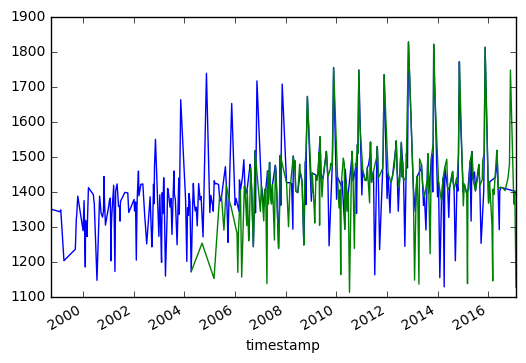

In [223]:
roger_federer.plot()
novak_djokovic.plot()